# Dataset

This dataset contains the results of an airline passenger satisfaction survey. Basic information of passengers and factors related to passenger satisfaction level to predict passenger satisfaction with the airline.

We will use the dataset ``test.csv`` downloaded from Kaggle throughout this project. 
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data
airline = pd.read_csv('/content/drive/MyDrive/CS245/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset description:



- ``Unnamed: 0`` : index of data
- ``id`` : id of the passengers 
- ``Gender`` : Gender of the passengers (Female, Male)
- ``Customer Type`` : The customer type (Loyal customer, disloyal customer)
- ``Age`` : The actual age of the passengers
- ``Type of Travel`` : Purpose of the flight of the passengers (Personal Travel, Business, Travel)
- ``Class`` : Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- ``Flight Distance`` : The flight distance of this journey
- ``Inflight wifi service`` : Satisfaction level of the onflight wifi service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Departure/Arrival time convenient`` : Satisfaction level of Departure/Arrival time convenient (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Ease of Online booking`` : Satisfaction level of online booking (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Gate location`` : Satisfaction level of Gate location (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Food and drink`` : Satisfaction level of Food and drink (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Online boarding`` : Satisfaction level of online boarding (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Seat comfort`` : Satisfaction level of Seat comfort (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Inflight entertainment`` : Satisfaction level of inflight entertainment (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``On-board service`` : Satisfaction level of On-board service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Leg room service`` : Satisfaction level of Leg room service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Baggage handling`` : Satisfaction level of baggage handling (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Check-in service`` : Satisfaction level of Check-in service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Inflight service`` : Satisfaction level of inflight service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Cleanliness`` : Satisfaction level of Cleanliness (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)
- ``Departure Delay in Minutes`` : Minutes delayed when departure
- ``Arrival Delay in Minutes`` : Minutes delayed when Arrival
- ``Satisfaction`` : Airline satisfaction level (Satisfaction, neutral or dissatisfaction)  

In [ ]:
# Sample view of the dataset
airline.head()                          # The first 5 rows

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# Show a summary about the dataset
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

The dataset above contains a total of 25976 rows of data (from index 0 to 25975) and 25 columns. This dataset contains data types float (1 column), int (19 columns), and object (5 columns), it's also shown the number of null values if any.

In [ ]:
# Show a statistical information of the dataset
airline.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


The detailed descriptive statistics of the dataset are shown above (eg. mean, count). Notice that statistics are computed and shown for numeric fields only.

In [ ]:
# The dimensionality of the dataframe
airline.shape

(25976, 25)

In [ ]:
# Show unique counts per category in each column
for a in airline.columns:
  print("-----%s-----" % a)
  print(airline[a].value_counts())

# Data Cleansing and Preparation

In [ ]:
# Rename the columns
airline.rename(columns={'Unnamed: 0':'Index'},inplace=True)             # unnamed column
airline.rename(columns={'id':'ID'},inplace=True)
airline.rename(columns={'satisfaction':'Satisfaction'},inplace=True)

In [ ]:
# Replace value in column 'Customer Type'
airline['Customer Type'].replace({'disloyal Customer': 'Disloyal Customer'},inplace = True)

## NaN Values

In [ ]:
# Find whether any null value exists in the dataframe
airline.isnull().sum()

There is 83 missing values in Arrival Delay in Minutes variable.

Fill missing values in the column Arrival Delay in Minutes with 0.

In [ ]:
print("Number of missing values found =", airline.isnull().sum().sum())

# Replace NaN values in the column 'Arrival Delay in Minutes' with 0 
airline['Arrival Delay in Minutes'].fillna(0, inplace = True) 

print("Afterwards, number of missing values found =", airline.isnull().sum().sum())

Number of missing values found = 83
Afterwards, number of missing values found = 0


## Duplicate Values

In [ ]:
# Check whether there is any duplicate in the dataframe
print("Number of duplicate found =" ,airline.duplicated().sum())

Number of duplicate found = 0


The column Arrival Delay in Minutes has the number of minutes delayed when arrival. Therefore, values in this column must be integral and the data type of this column should be type integer.

In [ ]:
# Check whether there is any non-integral values there are in the column 'Arrival Delay in Minutes'
count = 0
for minute in airline['Arrival Delay in Minutes'] :
  if (minute.is_integer() == False) :
    count += 1
print("There are", count, "non-integral values in the column 'Arrival Delay in Minutes'")

# Check the data type of the column 'Arrival Delay in Minutes'
print("Originally, the column 'Arrival Delay in Minutes' is of type:", airline['Arrival Delay in Minutes'].dtypes)    

# Change the data type of the column 'Arrival Delay in Minutes'
airline = airline.astype({"Arrival Delay in Minutes": np.uint32})  

print("Afterwards, the column 'number' is of type:", airline['Arrival Delay in Minutes'].dtypes)

There are 0 non-integral values in the column 'Arrival Delay in Minutes'
Originally, the column 'Arrival Delay in Minutes' is of type: float64
Afterwards, the column 'number' is of type: uint32


# Data Validity 

Several columns have values 0-5, as these indicate ratings. To ensure we don't include useless data (or overly strong data) we'll check whether there is any row has a satisfaction level out of range and remove all of them.

In [ ]:
# Rows that has a satisfaction level
wifi = ((airline['Inflight wifi service'] < 0).sum()) + ((airline['Inflight wifi service'] > 5).sum())
time_convenient = ((airline['Departure/Arrival time convenient'] < 0).sum()) + ((airline['Departure/Arrival time convenient'] > 5).sum())
online_booking = ((airline['Ease of Online booking'] < 0).sum()) + ((airline['Ease of Online booking'] > 5).sum())
gate_location = ((airline['Gate location'] < 0).sum()) + ((airline['Gate location'] > 5).sum())
food_and_drink = ((airline['Food and drink'] < 0).sum()) + ((airline['Food and drink'] > 5).sum())
online_boarding = ((airline['Online boarding'] < 0).sum()) + ((airline['Online boarding'] > 5).sum())
seat_comfort = ((airline['Seat comfort'] < 0).sum()) + ((airline['Seat comfort'] > 5).sum())
entertainment = ((airline['Inflight entertainment'] < 0).sum()) + ((airline['Inflight entertainment'] > 5).sum())
on_board = ((airline['On-board service'] < 0).sum()) + ((airline['On-board service'] > 5).sum())
leg_room = ((airline['Leg room service'] < 0).sum()) + ((airline['Leg room service'] > 5).sum())
baggage_handling = ((airline['Baggage handling'] < 0).sum()) + ((airline['Baggage handling'] > 5).sum())
check_in = ((airline['Checkin service'] < 0).sum()) + ((airline['Checkin service'] > 5).sum()) 
inflight_service = ((airline['Inflight service'] < 0).sum()) + ((airline['Inflight service'] > 5).sum())
cleanliness = ((airline['Cleanliness'] < 0).sum()) + ((airline['Cleanliness'] > 5).sum())

# Check whether there is any row has a satisfaction level out of range (0 - 5)
count = 0
if (wifi > 0 
    or time_convenient > 0
    or online_booking > 0
    or gate_location > 0
    or food_and_drink > 0
    or online_boarding > 0
    or seat_comfort > 0
    or entertainment > 0
    or on_board > 0
    or leg_room > 0
    or baggage_handling > 0
    or check_in > 0
    or inflight_service > 0
    or cleanliness > 0) :
  count += 1
  
print("Number of rows with satisfaction level out of range =", count)

Number of rows with satisfaction level out of range = 0


# Data Visualization

In [ ]:
# Sets style
sns.set_palette("rainbow")

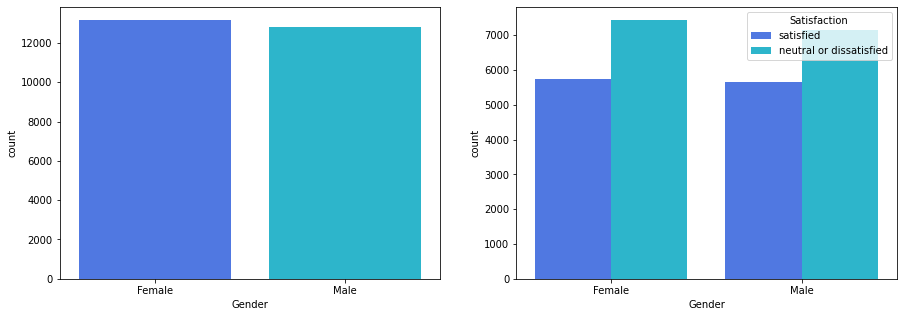

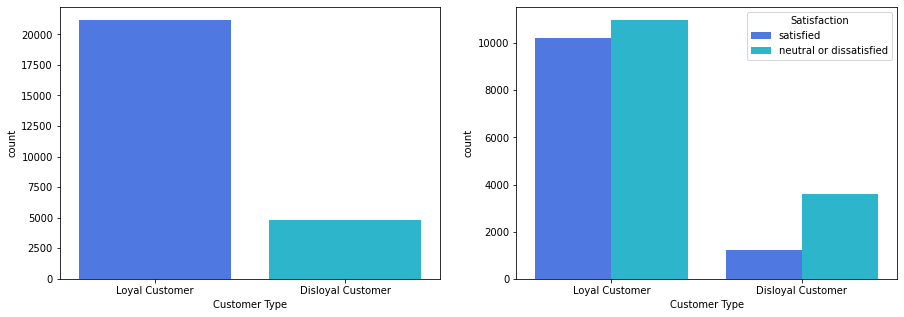

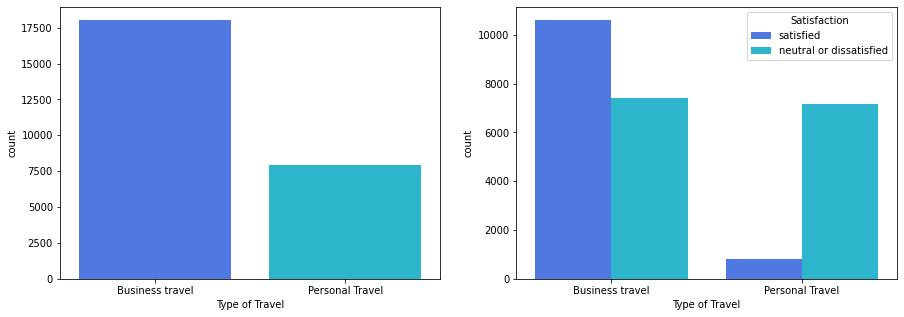

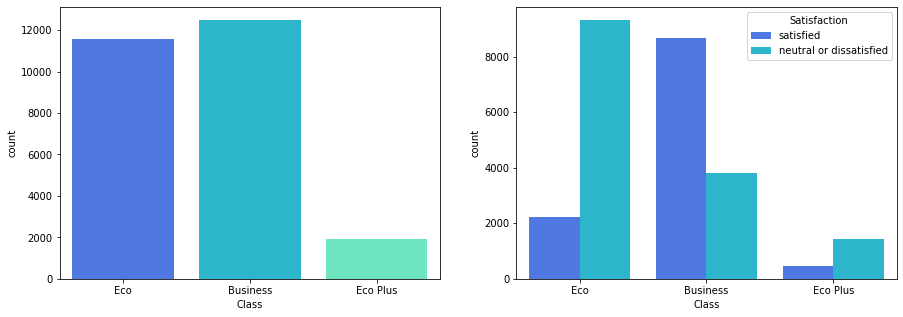

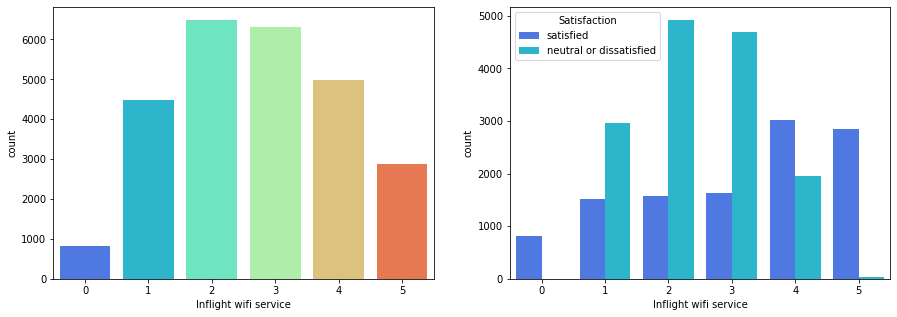

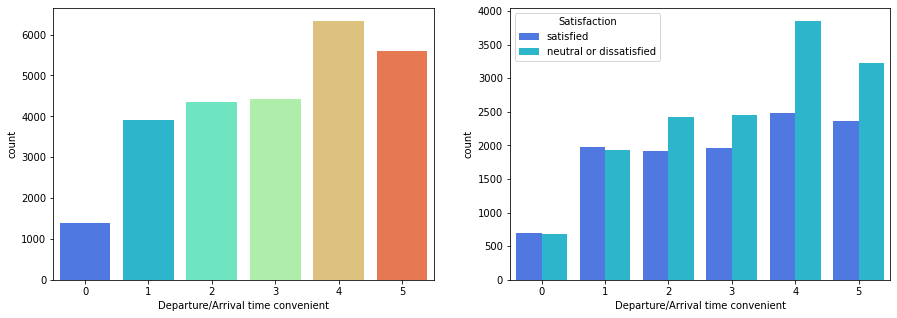

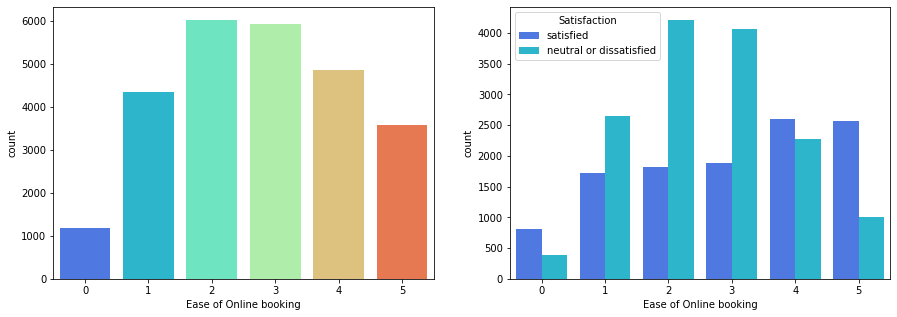

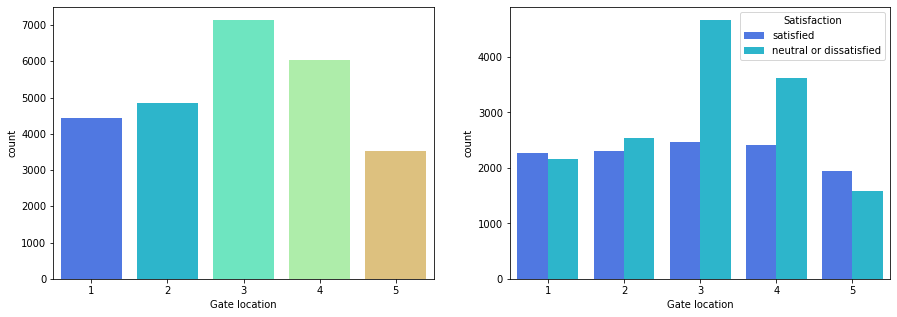

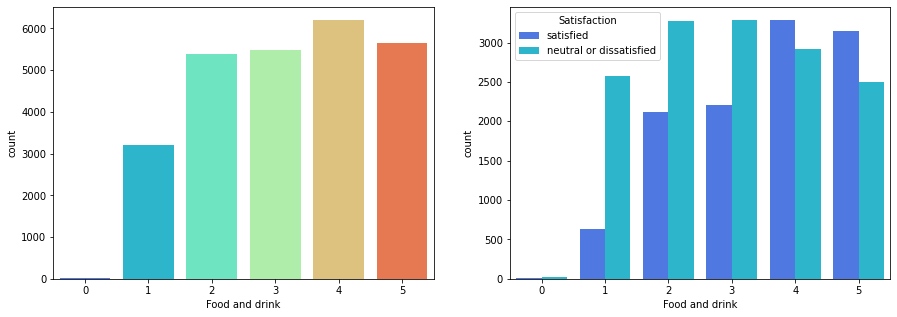

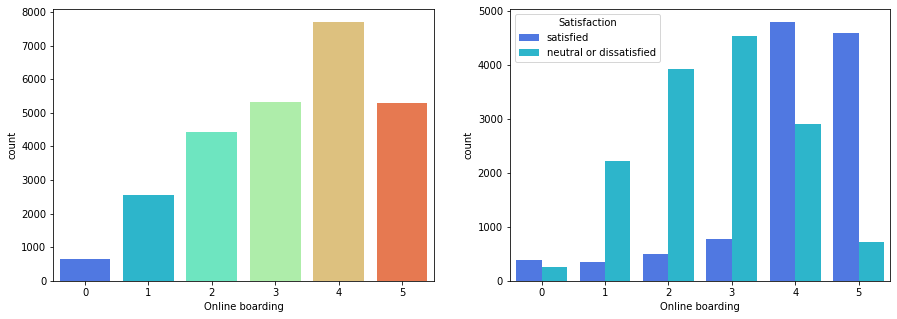

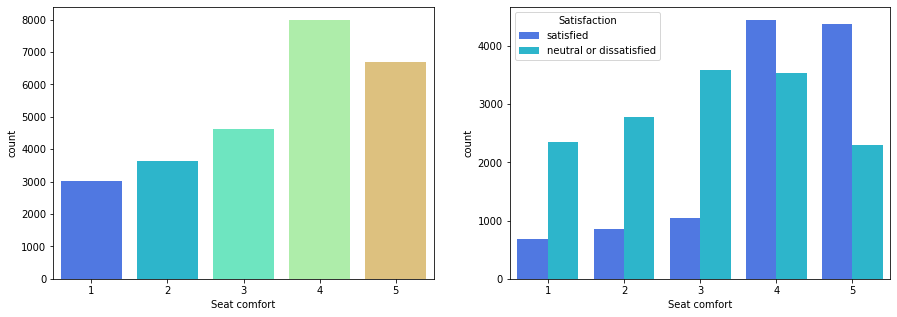

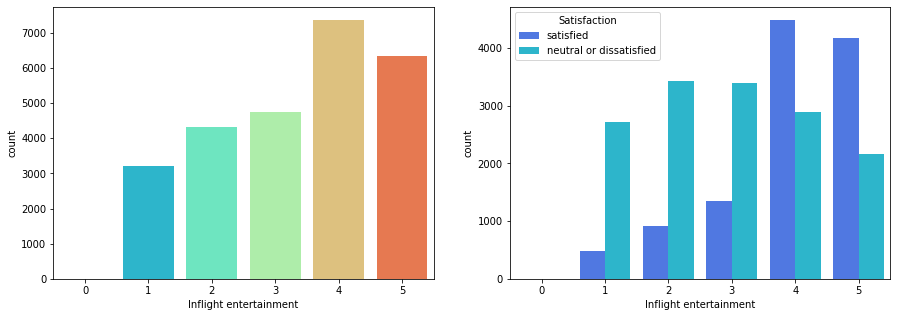

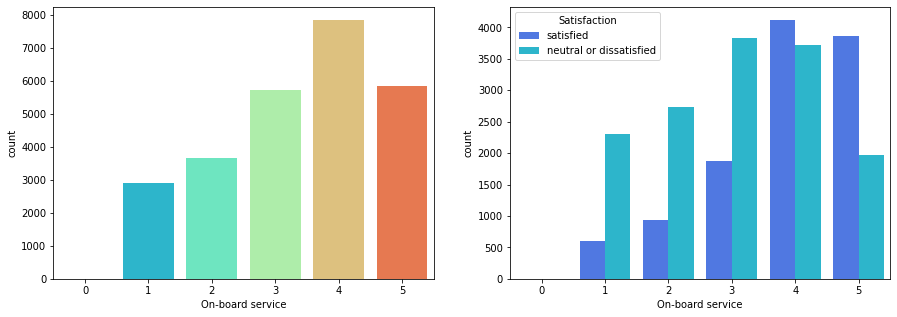

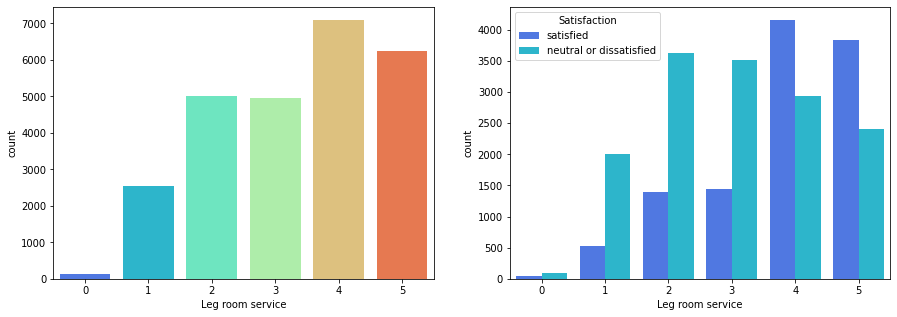

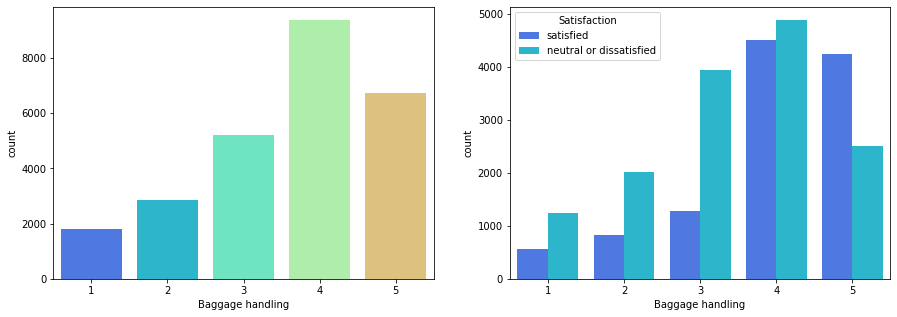

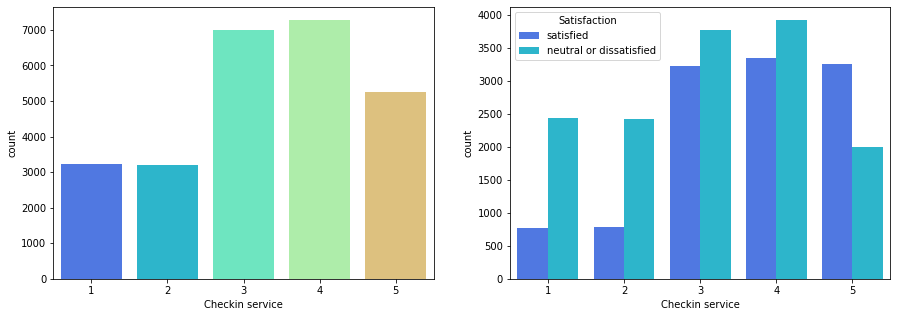

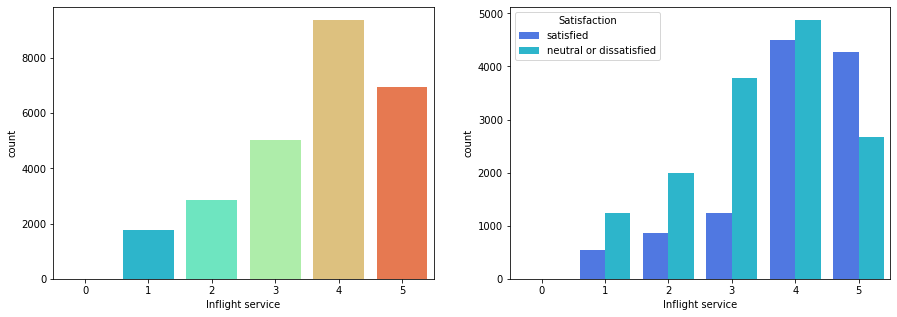

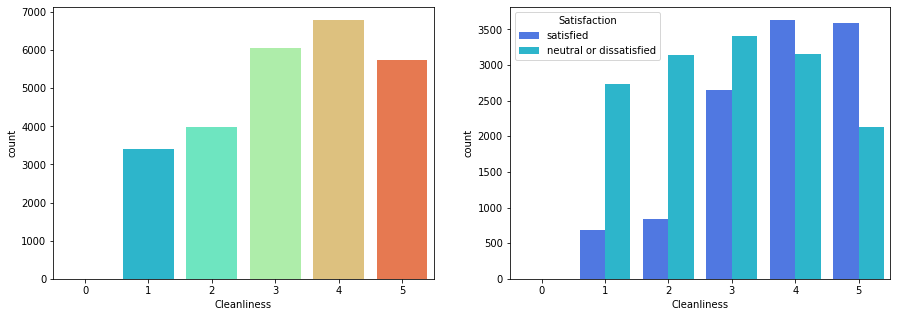

In [ ]:
columns = ['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

for i in columns :
  plt.figure(figsize = (15, 5))
  plt.subplot(1, 2, 1)
  sns.countplot(x = airline[i])

  plt.subplot(1, 2, 2)
  sns.countplot(x = airline[i], hue = airline.Satisfaction)

  plt.show()

Female and male data amounts are close to each other. In the Customer Type, which is divided into two types as Loyal customer and Disloyal customer, the number of Loyal customers is more than the number of Disloyal customers. Almost half of the Loyal customers are satisfied and half are neutral or dissatisfied. But in Disloyal customers, the number of satisfied passengers is less than the number of neutral or dissatisfied. Type of Travel consists of two types as Personal and Business travel. The number of passengers making Business travel is higher than those making Personnel travel. While the number of satisfied passengers is higher in Business travel, the number of satisfied passengers is very low in Personal travel. Class features are divided into three classes: Economy, Business, and Economy Plus. While the number of passengers in the Business and Eco classes is close to each other, the number of passengers in the Eco Plus class is much less. While the majority of passengers in Business class are satisfied, the majority of passengers in Eco class are neutral or dissatisfied. In the other factors, there are 6 levels from 1 to 5 (Satisfaction rates), while 0 represents unsatisfactory factors. As we can predict for other factors, neutral or dissatisfied passengers are more at low satisfaction levels like 0-1-2 at the beginning, while satisfied passengers are more at high satisfaction levels like 4-5.

Let's explore the number of passengers and percentage of passengers in each factor.

## Age

The dataset contains the age of passengers between 7 to 85 years old.
The maximum number of the age of passengers found in airlines: 723 people.
The minimum number of the age of passengers found in airlines: 8 people.
The average age of passengers found in airlines: 40 years old.



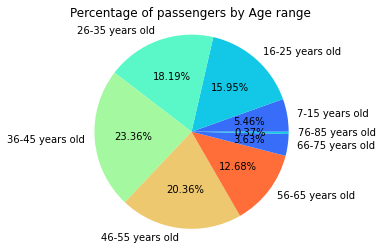

In [ ]:
age = airline.filter(['Age']).groupby('Age')['Age'].count().values
print("The dataset contains the age of passengers between", airline['Age'].min(), "to", airline['Age'].max(), "years old.")
print("The maximum number of the age of passengers found in airlines:", age.max(), "people.")
print("The minimum number of the age of passengers found in airlines:", age.min(), "people.")
print("The average age of passengers found in airlines:", round(airline['Age'].mean()), "years old.")
print()

# Age ranges
age_7_to_15 = (airline.query('Age >= 7 and Age <= 15').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_16_to_25 = (airline.query('Age > 15 and Age <= 25').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_26_to_35 = (airline.query('Age > 25 and Age <= 35').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_36_to_45 = (airline.query('Age > 35 and Age <= 45').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_46_to_55 = (airline.query('Age > 45 and Age <= 55').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_56_to_65 = (airline.query('Age > 55 and Age <= 65').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_66_to_75 = (airline.query('Age > 65 and Age <= 75').filter(['Age']).groupby('Age')['Age'].count()).sum()
age_76_to_85 = (airline.query('Age > 75 and Age <= 85').filter(['Age']).groupby('Age')['Age'].count()).sum()

# Plot Pie chart
age_range = ['7-15 years old', '16-25 years old', '26-35 years old', '36-45 years old', '46-55 years old', '56-65 years old', '66-75 years old', '76-85 years old']
age_percent = [(age_7_to_15 / age.sum() * 100), (age_16_to_25 / age.sum() * 100), (age_26_to_35 / age.sum() * 100),
               (age_36_to_45 / age.sum() * 100), (age_46_to_55 / age.sum() * 100), (age_56_to_65 / age.sum() * 100),
               (age_66_to_75 / age.sum() * 100), (age_76_to_85 / age.sum() * 100)]

fig, ax = plt.subplots()
plt.title("Percentage of passengers by Age range")
ax.pie(age_percent, labels = age_range, autopct = '%1.2f%%', shadow = False, startangle = 0) 
_ = ax.axis('equal')

## Gender

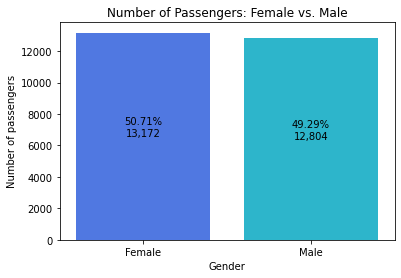

In [ ]:
all = (airline['Gender'].value_counts()).sum()
gender = ['Female', 'Male']
gender_num = airline['Gender'].value_counts()
gender_percent = list((gender_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(gender_num))) :
    list(gender_num)[i] = int(list(gender_num)[i])

ax = sns.barplot(x = gender, y = list(gender_num))
plt.title("Number of Passengers: Female vs. Male")
plt.ylabel("Number of passengers")
plt.xlabel("Gender")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(gender_percent[i]) + '\n' + str("{:,}".format(list(gender_num)[i])), (x, y), ha = 'center')

plt.show()

## Customer Type

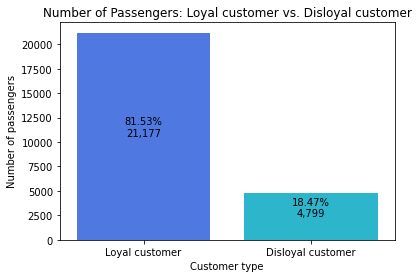

In [ ]:
all = (airline['Customer Type'].value_counts()).sum()
customer = ['Loyal customer', 'Disloyal customer']
customer_num = airline['Customer Type'].value_counts()
customer_percent = list((customer_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(customer_num))) :
    list(customer_num)[i] = int(list(customer_num)[i])

ax = sns.barplot(x = customer, y = list(customer_num))
plt.title("Number of Passengers: Loyal customer vs. Disloyal customer")
plt.ylabel("Number of passengers")
plt.xlabel("Customer type")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(customer_percent[i]) + '\n' + str("{:,}".format(list(customer_num)[i])), (x, y), ha = 'center')

plt.show()

## Type of Traval

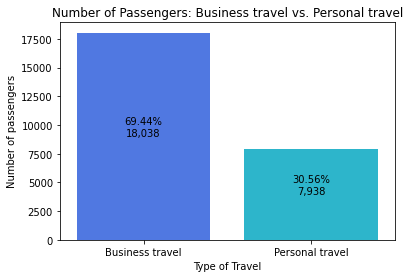

In [ ]:
all = (airline['Type of Travel'].value_counts()).sum()
travel = ['Business travel', 'Personal travel']
travel_num = airline['Type of Travel'].value_counts()
travel_percent = list((travel_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(travel_num))) :
    list(travel_num)[i] = int(list(travel_num)[i])

ax = sns.barplot(x = travel, y = list(travel_num))
plt.title("Number of Passengers: Business travel vs. Personal travel")
plt.ylabel("Number of passengers")
plt.xlabel("Type of Travel")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(travel_percent[i]) + '\n' + str("{:,}".format(list(travel_num)[i])), (x, y), ha = 'center')

plt.show()

## Class

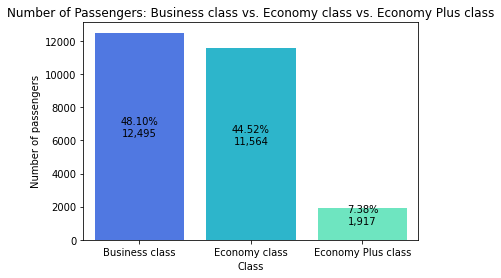

In [ ]:
all = (airline['Class'].value_counts()).sum()
classes = ['Business class', 'Economy class', 'Economy Plus class']
class_num = airline['Class'].value_counts()
class_percent = list((class_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(class_num))) :
    list(class_num)[i] = int(list(class_num)[i])

ax = sns.barplot(x = classes, y = list(class_num))
plt.title("Number of Passengers: Business class vs. Economy class vs. Economy Plus class")
plt.ylabel("Number of passengers")
plt.xlabel("Class")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(class_percent[i]) + '\n' + str("{:,}".format(list(class_num)[i])), (x, y), ha = 'center')

plt.show()

## Inflight wifi service

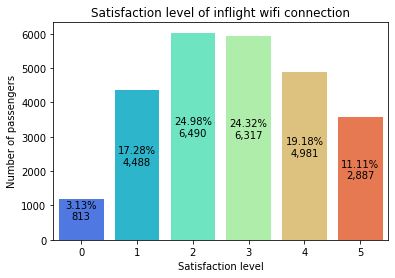

In [ ]:
all = (airline['Inflight wifi service'].value_counts()).sum()
wifi_num = airline.filter(['Inflight wifi service']).groupby('Inflight wifi service')['Inflight wifi service'].count()
wifi_num = list(wifi_num.values)
wifi_percent = list((wifi_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(wifi_num))) :
    list(wifi_num)[i] = int(list(wifi_num)[i])

ax = sns.countplot(x ='Ease of Online booking', data = airline)
plt.title("Satisfaction level of inflight wifi connection")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(wifi_percent[i]) + '\n' + str("{:,}".format(list(wifi_num)[i])), (x, y), ha = 'center')

plt.show()

## Departure/Arrival time convenient

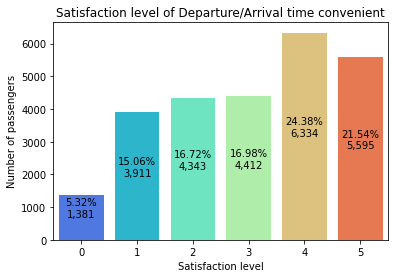

In [ ]:
all = (airline['Departure/Arrival time convenient'].value_counts()).sum()
time_convenient_num = airline.filter(['Departure/Arrival time convenient']).groupby('Departure/Arrival time convenient')['Departure/Arrival time convenient'].count()
time_convenient_num = list(time_convenient_num.values)
time_convenient_percent = list((time_convenient_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(time_convenient_num))) :
    list(time_convenient_num)[i] = int(list(time_convenient_num)[i])

ax = sns.countplot(x ='Departure/Arrival time convenient', data = airline)
plt.title("Satisfaction level of Departure/Arrival time convenient")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(time_convenient_percent[i]) + '\n' + str("{:,}".format(list(time_convenient_num)[i])), (x, y), ha = 'center')

plt.show()

## Ease of Online booking

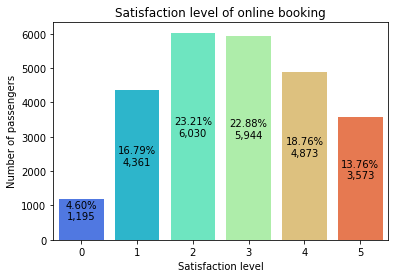

In [ ]:
all = (airline['Ease of Online booking'].value_counts()).sum()
online_booking_num = airline.filter(['Ease of Online booking']).groupby('Ease of Online booking')['Ease of Online booking'].count()
online_booking_num = list(online_booking_num.values)
online_booking_percent = list((online_booking_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(online_booking_num))) :
    list(online_booking_num)[i] = int(list(online_booking_num)[i])

ax = sns.countplot(x ='Ease of Online booking', data = airline)
plt.title("Satisfaction level of online booking")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(online_booking_percent[i]) + '\n' + str("{:,}".format(list(online_booking_num)[i])), (x, y), ha = 'center')

plt.show()

## Gate location

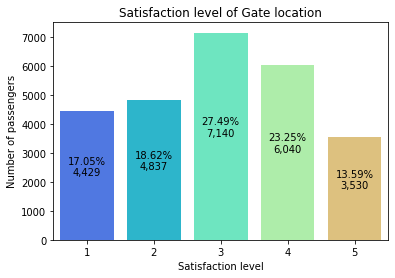

In [ ]:
all = (airline['Gate location'].value_counts()).sum()
gate_num = airline.filter(['Gate location']).groupby('Gate location')['Gate location'].count()
gate_num = list(gate_num.values)
gate_percent = list((gate_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(gate_num))) :
    list(gate_num)[i] = int(list(gate_num)[i])

ax = sns.countplot(x ='Gate location', data = airline)
plt.title("Satisfaction level of Gate location")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(gate_percent[i]) + '\n' + str("{:,}".format(list(gate_num)[i])), (x, y), ha = 'center')

plt.show()

## Food and drink

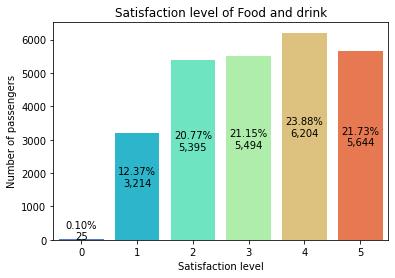

In [ ]:
all = (airline['Food and drink'].value_counts()).sum()
food_and_drink_num = airline.filter(['Food and drink']).groupby('Food and drink')['Food and drink'].count()
food_and_drink_num = list(food_and_drink_num.values)
food_and_drink_percent = list((food_and_drink_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(food_and_drink_num))) :
    list(food_and_drink_num)[i] = int(list(food_and_drink_num)[i])

ax = sns.countplot(x ='Food and drink', data = airline)
plt.title("Satisfaction level of Food and drink")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(food_and_drink_percent[i]) + '\n' + str("{:,}".format(list(food_and_drink_num)[i])), (x, y), ha = 'center')

plt.show()

## Online boarding

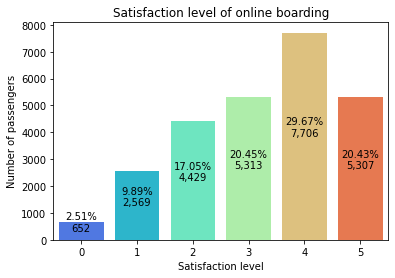

In [ ]:
all = (airline['Online boarding'].value_counts()).sum()
online_boarding_num = airline.filter(['Online boarding']).groupby('Online boarding')['Online boarding'].count()
online_boarding_num = list(online_boarding_num.values)
online_boarding_percent = list((online_boarding_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(online_boarding_num))) :
    list(online_boarding_num)[i] = int(list(online_boarding_num)[i])

ax = sns.countplot(x ='Online boarding', data = airline)
plt.title("Satisfaction level of online boarding")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(online_boarding_percent[i]) + '\n' + str("{:,}".format(list(online_boarding_num)[i])), (x, y), ha = 'center')

plt.show()

## Seat comfort

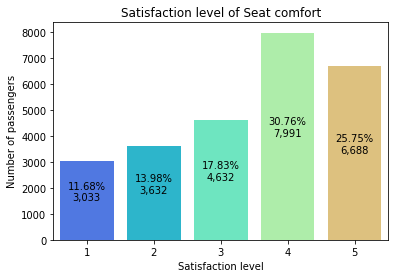

In [ ]:
all = (airline['Seat comfort'].value_counts()).sum()
seat_num = airline.filter(['Seat comfort']).groupby('Seat comfort')['Seat comfort'].count()
seat_num = list(seat_num.values)
seat_percent = list((seat_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(seat_num))) :
    list(seat_num)[i] = int(list(seat_num)[i])

ax = sns.countplot(x ='Seat comfort', data = airline)
plt.title("Satisfaction level of Seat comfort")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(seat_percent[i]) + '\n' + str("{:,}".format(list(seat_num)[i])), (x, y), ha = 'center')

plt.show()

## Inflight entertainment

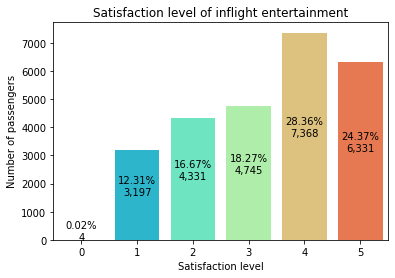

In [ ]:
all = (airline['Inflight entertainment'].value_counts()).sum()
entertainment_num = airline.filter(['Inflight entertainment']).groupby('Inflight entertainment')['Inflight entertainment'].count()
entertainment_num = list(entertainment_num.values)
entertainment_percent = list((entertainment_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(entertainment_num))) :
    list(entertainment_num)[i] = int(list(entertainment_num)[i])

ax = sns.countplot(x ='Inflight entertainment', data = airline)
plt.title("Satisfaction level of inflight entertainment")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(entertainment_percent[i]) + '\n' + str("{:,}".format(list(entertainment_num)[i])), (x, y), ha = 'center')

plt.show()

## On-board service

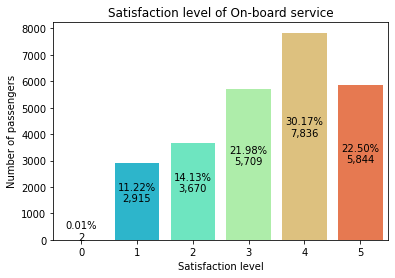

In [ ]:
all = (airline['On-board service'].value_counts()).sum()
on_board_num = airline.filter(['On-board service']).groupby('On-board service')['On-board service'].count()
on_board_num = list(on_board_num.values)
on_board_percent = list((on_board_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(on_board_num))) :
    list(on_board_num)[i] = int(list(on_board_num)[i])

ax = sns.countplot(x ='On-board service', data = airline)
plt.title("Satisfaction level of On-board service")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(on_board_percent[i]) + '\n' + str("{:,}".format(list(on_board_num)[i])), (x, y), ha = 'center')

plt.show()

## Leg room service

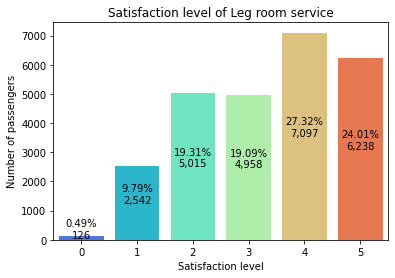

In [ ]:
all = (airline['Leg room service'].value_counts()).sum()
leg_room_num = airline.filter(['Leg room service']).groupby('Leg room service')['Leg room service'].count()
leg_room_num = list(leg_room_num.values)
leg_room_percent = list((leg_room_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(leg_room_num))) :
    list(leg_room_num)[i] = int(list(leg_room_num)[i])

ax = sns.countplot(x ='Leg room service', data = airline)
plt.title("Satisfaction level of Leg room service")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(leg_room_percent[i]) + '\n' + str("{:,}".format(list(leg_room_num)[i])), (x, y), ha = 'center')

plt.show()

## Baggage handling

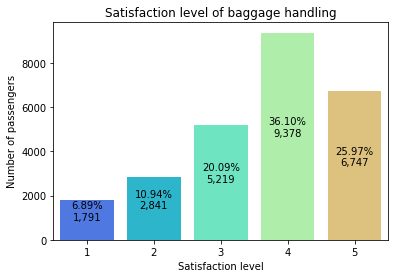

In [ ]:
all = (airline['Baggage handling'].value_counts()).sum()
baggage_num = airline.filter(['Baggage handling']).groupby('Baggage handling')['Baggage handling'].count()
baggage_num = list(baggage_num.values)
baggage_percent = list((baggage_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(baggage_num))) :
    list(baggage_num)[i] = int(list(baggage_num)[i])

ax = sns.countplot(x ='Baggage handling', data = airline)
plt.title("Satisfaction level of baggage handling")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(baggage_percent[i]) + '\n' + str("{:,}".format(list(baggage_num)[i])), (x, y), ha = 'center')

plt.show()

## Check-in service

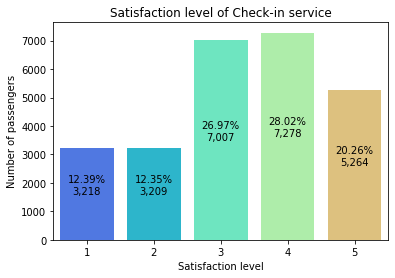

In [ ]:
all = (airline['Checkin service'].value_counts()).sum()
check_in_num = airline.filter(['Checkin service']).groupby('Checkin service')['Checkin service'].count()
check_in_num = list(check_in_num.values)
check_in_percent = list((check_in_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(check_in_num))) :
    list(check_in_num)[i] = int(list(check_in_num)[i])

ax = sns.countplot(x ='Checkin service', data = airline)
plt.title("Satisfaction level of Check-in service")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(check_in_percent[i]) + '\n' + str("{:,}".format(list(check_in_num)[i])), (x, y), ha = 'center')

plt.show()

## Inflight service

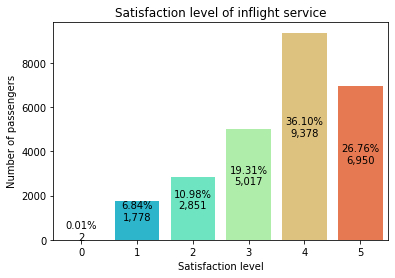

In [ ]:
all = (airline['Inflight service'].value_counts()).sum()
service_num = airline.filter(['Inflight service']).groupby('Inflight service')['Inflight service'].count()
service_num = list(service_num.values)
service_percent = list((service_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(service_num))) :
    list(service_num)[i] = int(list(service_num)[i])

ax = sns.countplot(x ='Inflight service', data = airline)
plt.title("Satisfaction level of inflight service")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(service_percent[i]) + '\n' + str("{:,}".format(list(service_num)[i])), (x, y), ha = 'center')

plt.show()

## Cleanliness

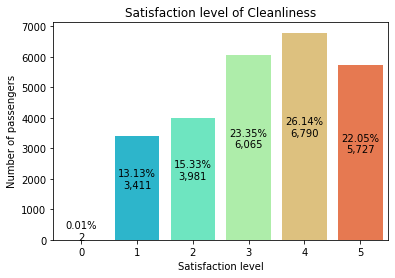

In [ ]:
all = (airline['Cleanliness'].value_counts()).sum()
clean_num = airline.filter(['Cleanliness']).groupby('Cleanliness')['Cleanliness'].count()
clean_num = list(clean_num.values)
clean_percent = list((clean_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(clean_num))) :
    list(clean_num)[i] = int(list(clean_num)[i])

ax = sns.countplot(x ='Cleanliness', data = airline)
plt.title("Satisfaction level of Cleanliness")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction level")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(clean_percent[i]) + '\n' + str("{:,}".format(list(clean_num)[i])), (x, y), ha = 'center')

plt.show()

## Departure delay in minutes and Arrival delay in minutes

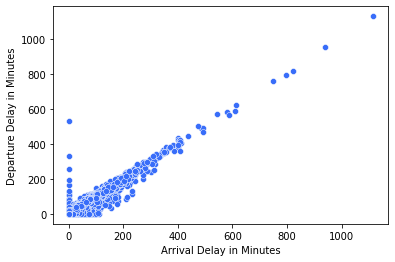

In [ ]:
sns.scatterplot(x = airline['Arrival Delay in Minutes'], y = airline['Departure Delay in Minutes'])
plt.show()

Departure Delay in Minutes and Arrival Delay in Minutes columns show a maximum value of 0. As the delay minutes increase, occurrences decrease. 

## Satisfaction

Out of 25976 satisfaction, there were 14573 which were neutral or dissatisfied.
This accounted for 56.10178626424391 percent.



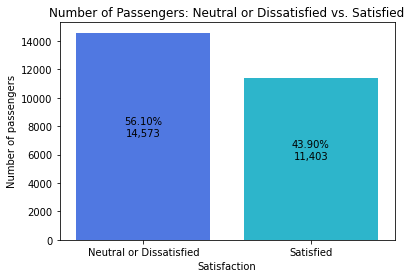

In [ ]:
all = (airline['Satisfaction'].value_counts()).sum()
dissatisfaction = (airline['Satisfaction'] == "neutral or dissatisfied").sum()
dissatisfaction_percent = (dissatisfaction / all) * 100

satisfaction = ['Neutral or Dissatisfied', 'Satisfied']
satisfaction_num = airline['Satisfaction'].value_counts()
satisfaction_percent = list((satisfaction_num / all) * 100)

# Convert to integer list
for i in range(0, len(list(satisfaction_num))) :
    list(satisfaction_num)[i] = int(list(satisfaction_num)[i])

print("Out of", all, "satisfaction, there were", dissatisfaction, "which were neutral or dissatisfied.")
print("This accounted for", dissatisfaction_percent, "percent.")
print()

ax = sns.barplot(x = satisfaction, y = list(satisfaction_num))
plt.title("Number of Passengers: Neutral or Dissatisfied vs. Satisfied")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(satisfaction_percent[i]) + '\n' + str("{:,}".format(list(satisfaction_num)[i])), (x, y), ha = 'center')

plt.show()

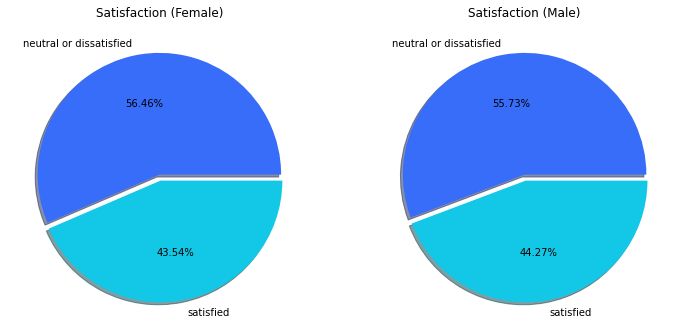

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(airline.loc[airline.Gender == "Female",'Satisfaction'].value_counts(), labels = ["neutral or dissatisfied","satisfied"],
        explode=[0, 0.05], autopct = '%1.2f%%', shadow = True)
plt.title('Satisfaction (Female)')

plt.subplot(1, 2, 2)
plt.pie(airline.loc[airline.Gender == "Male",'Satisfaction'].value_counts(), labels = ["neutral or dissatisfied","satisfied"],
        explode=[0, 0.05], autopct = '%1.2f%%', shadow = True)
plt.title('Satisfaction (Male)')

plt.show()

The satisfaction rates of women and men, see that both are around 43-44%. There is no dominance in satisfaction by gender. The dissatisfaction rate is higher in both genders.

## The number of passengers by Gender and Satisfied vs. Neutral or Dissatisfied

Gender  Satisfaction           
Female  neutral or dissatisfied    7437
        satisfied                  5735
Male    neutral or dissatisfied    7136
        satisfied                  5668
Name: Satisfaction, dtype: int64



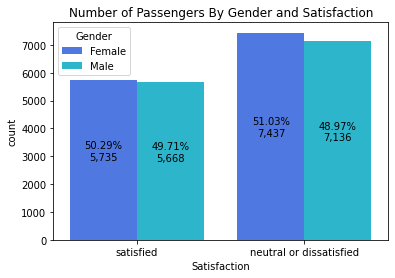

In [ ]:
level_num = airline.filter(['Gender', 'Satisfaction']).groupby(['Gender', 'Satisfaction'])['Satisfaction'].count()
print(level_num)
print()

satisfied = (airline['Satisfaction'] == "satisfied").sum()
dissatisfied = (airline['Satisfaction'] == "neutral or dissatisfied").sum()

male_satisfied = ((airline['Gender'] == "Male") & (airline['Satisfaction'] == "satisfied")).sum()
male_dissatisfied = ((airline['Gender'] == "Male") & (airline['Satisfaction'] == "neutral or dissatisfied")).sum()
female_satisfied = ((airline['Gender'] == "Female") & (airline['Satisfaction'] == "satisfied")).sum()
female_dissatisfied = ((airline['Gender'] == "Female") & (airline['Satisfaction'] == "neutral or dissatisfied")).sum()

male_satisfied_percent = (male_satisfied / satisfied) * 100
male_dissatisfied_percent = (male_dissatisfied / dissatisfied) * 100
female_satisfied_percent = (female_satisfied / satisfied) * 100
female_dissatisfied_percent = (female_dissatisfied / dissatisfied) * 100

data_percent = [female_satisfied_percent, female_dissatisfied_percent,  male_satisfied_percent, male_dissatisfied_percent]
data_num = [female_satisfied, female_dissatisfied, male_satisfied, male_dissatisfied]

ax = sns.countplot(x = 'Satisfaction', hue = 'Gender', data = airline)
plt.title("Number of Passengers By Gender and Satisfaction")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(data_percent[i]) + '\n' + str("{:,}".format(data_num[i])), (x, y), ha = 'center')

plt.show()

## The number of passengers by Gender and Loyal customer vs. Disloyal customer

Customer Type      Gender
Disloyal Customer  Female     2574
                   Male       2225
Loyal Customer     Female    10598
                   Male      10579
Name: Gender, dtype: int64



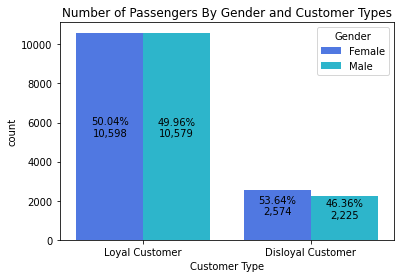

In [ ]:
type_num = airline.filter(['Customer Type', 'Gender']).groupby(['Customer Type', 'Gender'])['Gender'].count()
print(type_num)
print()

loyal = (airline['Customer Type'] == "Loyal Customer").sum()
disloyal = (airline['Customer Type'] == "Disloyal Customer").sum()

male_loyal = ((airline['Gender'] == "Male") & (airline['Customer Type'] == "Loyal Customer")).sum()
male_disloyal = ((airline['Gender'] == "Male") & (airline['Customer Type'] == "Disloyal Customer")).sum()
female_loyal = ((airline['Gender'] == "Female") & (airline['Customer Type'] == "Loyal Customer")).sum()
female_disloyal = ((airline['Gender'] == "Female") & (airline['Customer Type'] == "Disloyal Customer")).sum()

male_loyal_percent = (male_loyal / loyal) * 100
male_disloyal_percent = (male_disloyal / disloyal) * 100
female_loyal_percent = (female_loyal / loyal) * 100
female_disloyal_percent = (female_disloyal / disloyal) * 100

data_percent = [female_loyal_percent, female_disloyal_percent, male_loyal_percent, male_disloyal_percent]
data_num = [female_loyal, female_disloyal, male_loyal, male_disloyal]

ax = sns.countplot(x = 'Customer Type', hue = 'Gender', data = airline)
plt.title("Number of Passengers By Gender and Customer Types")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(data_percent[i]) + '\n' + str("{:,}".format(data_num[i])), (x, y), ha = 'center')

plt.show()

## The number of passengers by Gender and Business class vs. Economy class vs. Economy Plus class

Class     Gender
Business  Female    6336
          Male      6159
Eco       Female    5812
          Male      5752
Eco Plus  Female    1024
          Male       893
Name: Gender, dtype: int64



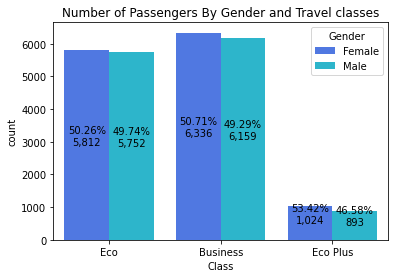

In [ ]:
class_num = airline.filter(['Class', 'Gender']).groupby(['Class', 'Gender'])['Gender'].count()
print(class_num)
print()

business = (airline['Class'] == "Business").sum()
eco = (airline['Class'] == "Eco").sum()
eco_plus = (airline['Class'] == "Eco Plus").sum()

male_business = ((airline['Gender'] == "Male") & (airline['Class'] == "Business")).sum()
male_eco = ((airline['Gender'] == "Male") & (airline['Class'] == "Eco")).sum()
male_eco_plus = ((airline['Gender'] == "Male") & (airline['Class'] == "Eco Plus")).sum()
female_business = ((airline['Gender'] == "Female") & (airline['Class'] == "Business")).sum()
female_eco = ((airline['Gender'] == "Female") & (airline['Class'] == "Eco")).sum()
female_eco_plus = ((airline['Gender'] == "Female") & (airline['Class'] == "Eco Plus")).sum()

male_business_percent = (male_business / business) * 100
male_eco_percent = (male_eco / eco) * 100
male_ece_plus_percent = (male_eco_plus / eco_plus) * 100
female_business_percent = (female_business / business) * 100
female_eco_percent = (female_eco / eco) * 100
female_ece_plus_percent = (female_eco_plus / eco_plus) * 100

data_percent = [female_eco_percent, female_business_percent, female_ece_plus_percent, 
                male_eco_percent, male_business_percent, male_ece_plus_percent]
data_num = [female_eco, female_business, female_eco_plus,
            male_eco, male_business, male_eco_plus]

ax = sns.countplot(x = 'Class', hue = 'Gender', data = airline)
plt.title("Number of Passengers By Gender and Travel classes")

patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()/2
   ax.annotate('{:.2f}%'.format(data_percent[i]) + '\n' + str("{:,}".format(data_num[i])), (x, y), ha = 'center')

plt.show()

## The factors that are supposed to affect the passengers' satisfaction with the most satisfied level

                              factor  NumFactors  NumFactors_percent
0                   Inflight service        6950               26.76
1                   Baggage handling        6747               25.97
2                       Seat comfort        6688               25.75
3             Inflight entertainment        6331               24.37
4                   Leg room service        6238               24.01
5                   On-board service        5844               22.50
6                        Cleanliness        5727               22.05
7                     Food and Drink        5644               21.73
8  Departure/Arrival time convenient        5595               21.54
9                    Online boarding        5307               20.43



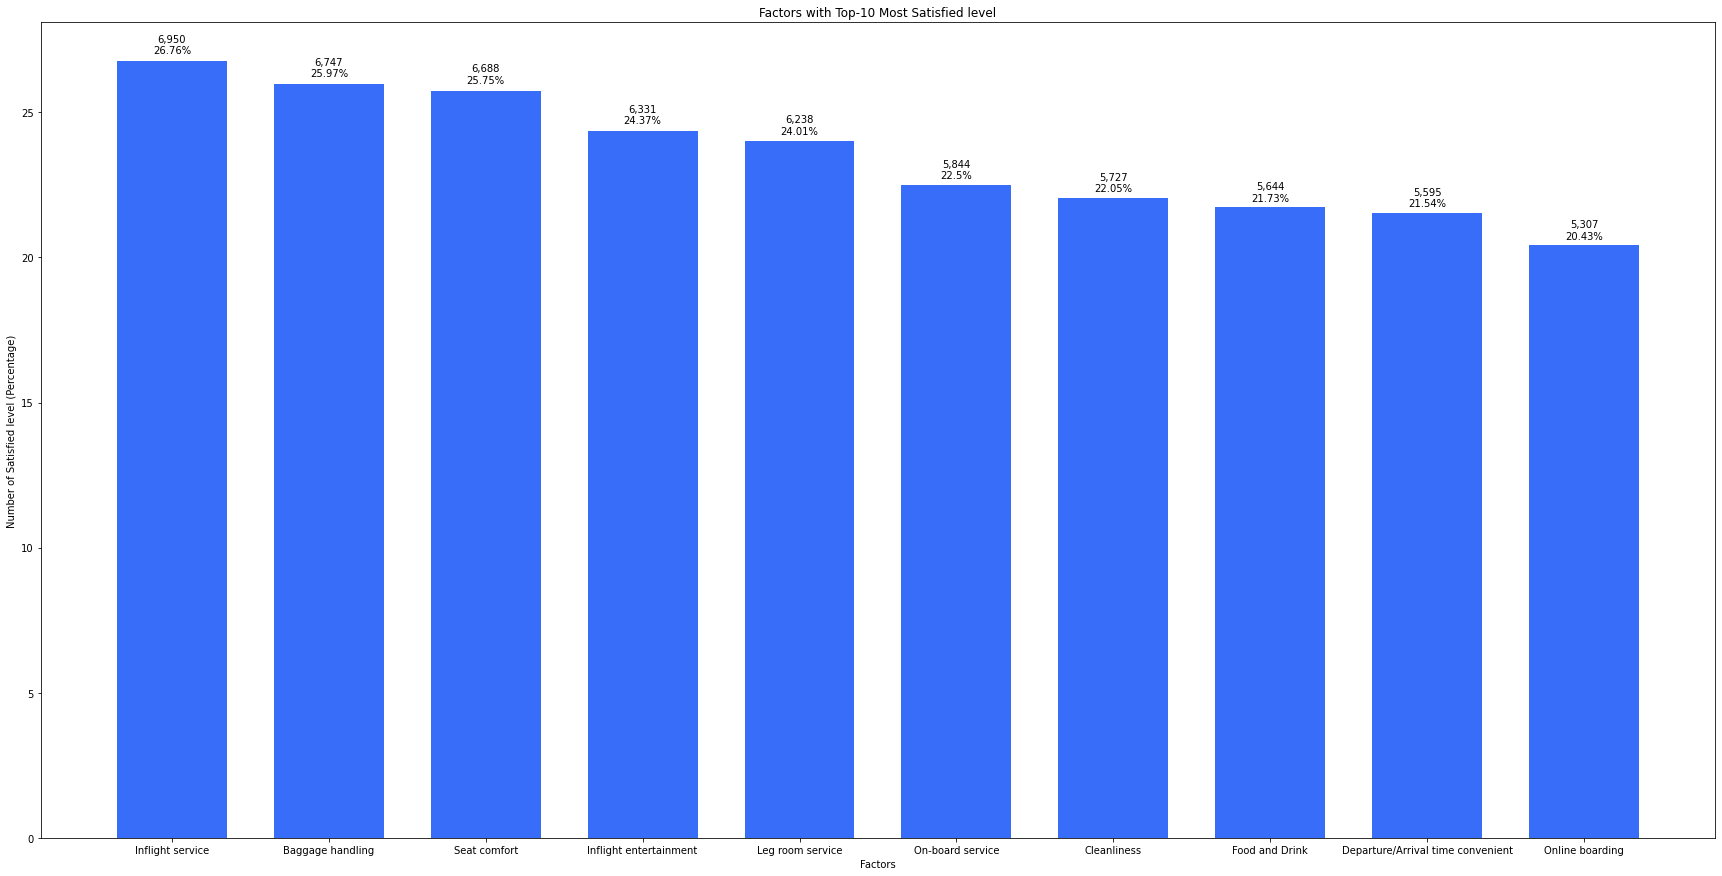

In [ ]:
all = airline['Satisfaction'].count()

# Compare factors that are supposed to affect the passengers' satisfaction
wifi = (airline['Inflight wifi service'] == 5).sum()
time_convenient = (airline['Departure/Arrival time convenient'] == 5).sum()
online_booking = (airline['Ease of Online booking'] == 5).sum()
gate_location = (airline['Gate location'] == 5).sum()
food_and_drink = (airline['Food and drink'] == 5).sum()
online_boarding = (airline['Online boarding'] == 5).sum()
seat_comfort = (airline['Seat comfort'] == 5).sum()
entertainment = (airline['Inflight entertainment'] == 5).sum()
on_board = (airline['On-board service'] == 5).sum()
leg_room = (airline['Leg room service'] == 5).sum()
baggage_handling = (airline['Baggage handling'] == 5).sum()
check_in = (airline['Checkin service'] == 5).sum()
inflight_service = (airline['Inflight service'] == 5).sum()
cleanliness = (airline['Cleanliness'] == 5).sum()

# Sorted number of satisfied level
factor_num = [wifi, time_convenient, online_booking, gate_location, food_and_drink,
           online_boarding, seat_comfort, entertainment, on_board, leg_room,
           baggage_handling, check_in, inflight_service, cleanliness]
factor_num = sorted(factor_num, reverse = True)
factor_num = factor_num[:10]
factor_num_percent = (factor_num / all) * 100
factor_num_percent = [round(num, 2) for num in factor_num_percent]

# Find Top-10 factors with the most satisfied level
factors = []
for i in range(len(factor_num)) :
   if (factor_num[i] == wifi) : factors.append("Inflight wifi service")
   elif (factor_num[i] == time_convenient) : factors.append("Departure/Arrival time convenient")
   elif (factor_num[i] == online_booking) : factors.append("Online booking")
   elif (factor_num[i] == gate_location) : factors.append("Gate location")
   elif (factor_num[i] == food_and_drink) : factors.append("Food and Drink")
   elif (factor_num[i] == online_boarding) : factors.append("Online boarding")
   elif (factor_num[i] == seat_comfort) : factors.append("Seat comfort")
   elif (factor_num[i] == entertainment) : factors.append("Inflight entertainment")
   elif (factor_num[i] == on_board) : factors.append("On-board service")
   elif (factor_num[i] == leg_room) : factors.append("Leg room service")
   elif (factor_num[i] == baggage_handling) : factors.append("Baggage handling")
   elif (factor_num[i] == check_in) : factors.append("Check-in service")
   elif (factor_num[i] == inflight_service) : factors.append("Inflight service")
   elif (factor_num[i] == cleanliness) : factors.append("Cleanliness")

data = pd.DataFrame({'factor': factors,
                     'NumFactors' : factor_num,
                     'NumFactors_percent' :factor_num_percent},
                   columns = ['factor', 'NumFactors', 'NumFactors_percent'])
print(data)
print()

# Create Bar chart
plt.figure(figsize=(30, 15))
bars = plt.bar(factors, factor_num_percent, width = 0.7)

plt.title("Factors with Top-10 Most Satisfied level")
plt.xlabel("Factors")
plt.ylabel("Number of Satisfied level (Percentage)")

i = 0
for b in bars :
  width = b.get_width()
  height = b.get_height()
  x, y = b.get_xy()

  plt.text(x + width / 2,
           y + height * 1.01,
           str("{:,}".format(factor_num[i])) + '\n' + str(factor_num_percent[i]) + '%',
           ha = 'center')
  
  i += 1

plt.show()

## The popular journeys

   flight distance  flight count  flight count_percent
0              337           181                  0.70
1              594           110                  0.42
2              862           104                  0.40
3             2475           101                  0.39
4              391            95                  0.37
5              447            95                  0.37
6              192            91                  0.35
7              370            88                  0.34
8              404            88                  0.34
9              236            87                  0.33

Based on the number of flight count,
flight distance 337 km is the most popular journey



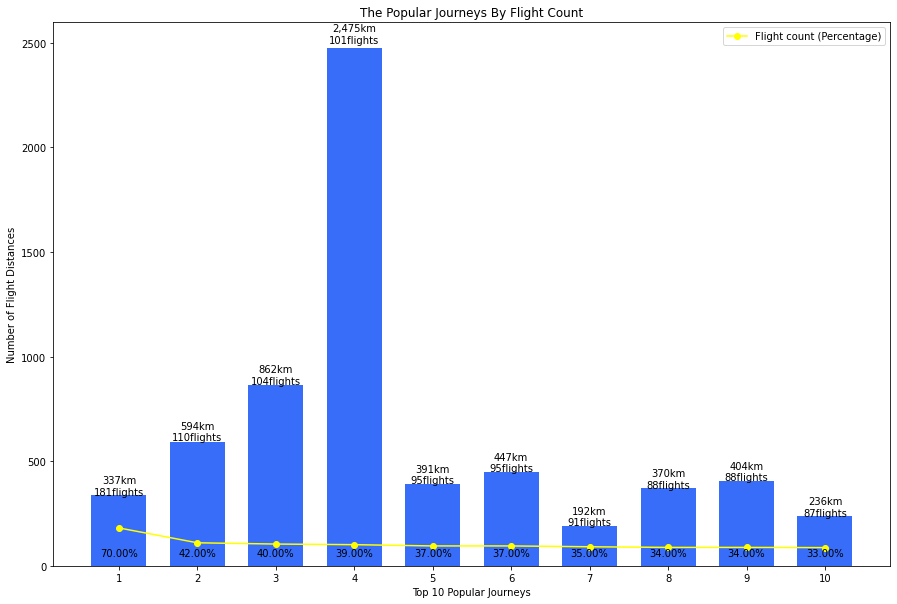

In [ ]:
all = (airline['Flight Distance']).count()
flight_count = list(airline['Flight Distance'].value_counts().head(10).values)
flight_distance = list(airline['Flight Distance'].value_counts().head(10).keys())
flight_count_percent = (flight_count / all) * 100
flight_count_percent = [round(num, 2) for num in flight_count_percent]

# Create the DataFrame 
data = pd.DataFrame({'flight distance': flight_distance,
                     'flight count': flight_count,
                     'flight count_percent': flight_count_percent},
                   columns = ['flight distance', 'flight count', 'flight count_percent'])

print(data)
print()

# Find the most popular journey
print("Based on the number of flight count,")
print("flight distance", flight_distance[0], "km is the most popular journey")
print()

# Create chart
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.figure(figsize=(15, 10))
bars = plt.bar(order, flight_distance, width = 0.7)                                                                    # Bar plot
lines = plt.plot(order, flight_count, label = 'Flight count (Percentage)', marker = 'o', color = 'yellow')             # Line plot
plt.legend()

plt.title("The Popular Journeys By Flight Count")
plt.xlabel("Top 10 Popular Journeys")
plt.ylabel("Number of Flight Distances")

# Display labels (Bar plot)
i = 0
for b in bars :
  width = b.get_width()
  height = b.get_height()
  x, y = b.get_xy()

  plt.text(x + width / 2,
           y + height * 1.01,
           str("{:,}".format(flight_distance[i])) + 'km' + '\n' + str(flight_count[i]) + 'flights',
           ha = 'center')
  
  i += 1

# Display labels (Line plot)
i = 0
for x,y in zip(order, flight_count_percent):
  plt.annotate("{:.2%}".format(flight_count_percent[i]), # this is the text
              (x,y), # these are the coordinates to position the label
              textcoords="offset points", # how to position the text
              xytext=(0,10), # distance from text to points (x,y)
              ha='center') # horizontal alignment can be left, right or center
  i += 1

plt.show()

## Average satisfaction ratings of services

Inflight service                     3.649253
Baggage handling                     3.633238
Seat comfort                         3.449222
On-board service                     3.385664
Inflight entertainment               3.357753
Leg room service                     3.350169
Checkin service                      3.314175
Cleanliness                          3.286226
Online boarding                      3.261665
Food and drink                       3.215353
Departure/Arrival time convenient    3.046812
Gate location                        2.977094
Ease of Online booking               2.756775
Inflight wifi service                2.724746
dtype: float64



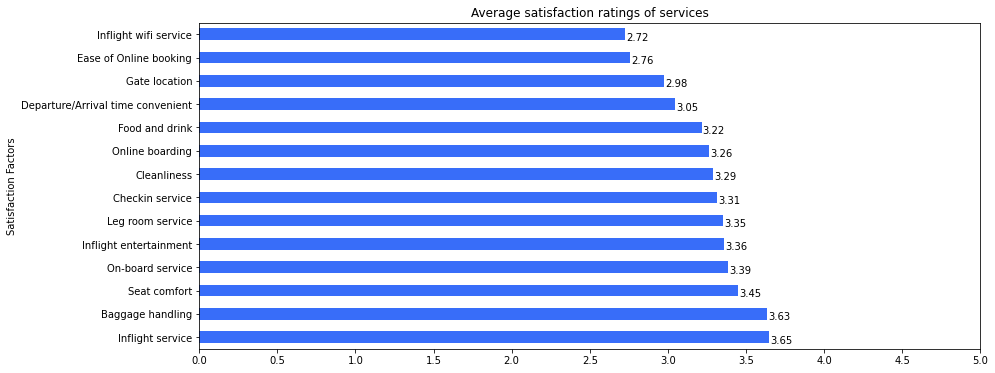

In [ ]:
category=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
print(airline[category].mean().sort_values(ascending = False))
print()

total = float(len(airline))
ax = airline[category].mean().sort_values(ascending = False).plot(kind = "barh", ylabel = "Satisfaction Factors" 
    ,xticks = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], figsize = (14, 6))
plt.title('Average satisfaction ratings of services')

for p in ax.patches:
    count = '{:.2f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width() + 0.15, p.get_y()
    ax.annotate(count, (x, y), ha = 'right')

plt.show()

The factors with the highest average satisfaction rate are Inflight service and Baggage handling with an average about 3.6. The factor with the lowest satisfaction rate is Inflight wifi service with average 2.7.

# Machine Learning: Model

In [ ]:
# Change data to numeric values
categories = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

column_dicts = {}

def categorize(df, cat):
    cats = df[cat].astype('category').cat.codes
    if (cat not in column_dicts):
        col_dict = dict(zip(cats, df[cat]))
        col_dict = {k: col_dict[k] for k in sorted(col_dict)} # Because it doesn't sort by default, that was fun
        column_dicts[cat] = col_dict
    df[cat] = cats

def categorizeAll(df):
    for cat in categories:
        categorize(df, cat)

categorizeAll(airline)

airline

,Index,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,0,19556,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44,satisfied
1,1,90035,0,1,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0,satisfied
2,2,12360,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
3,3,77959,1,1,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6,satisfied
4,4,36875,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,0,34,0,0,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0,neutral or dissatisfied
25972,25972,71167,1,1,23,0,0,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0,satisfied
25973,25973,37675,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,neutral or dissatisfied
25974,25974,90086,1,1,14,0,0,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0,satisfied


We will split the dataset into two,

80% of which will use to train, evaluate and select among our models, and
20% that will hold back as a validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset  
array = airline.values
X = array[:,0:24]
y = array[:,24]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.20, random_state = 1)

print("The whole dataset contains {0} points: divide into 80% training and 20% testing.".format(airline.shape[0]))
print("Training set 'features' contains {0} points.".format(len(X_train)))
print("Training set 'labels' contains {0} points.".format(len(Y_train)))  
print("Testing set 'features' contains {0} points.".format(len(X_validation)))
print("Testing set 'labels' contains {0} points.\n\n".format(len(Y_validation)))

The whole dataset contains 25976 points: divide into 80% training and 20% testing.
Training set 'features' contains 20780 points.
Training set 'labels' contains 20780 points.
Testing set 'features' contains 5196 points.
Testing set 'labels' contains 5196 points.




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create an array of all ML Supervised Classification algorithms to be used
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # We set the random seed via the 'random_state' argument to a fixed number e.g. random_state=1.
  # This is to ensure that each algorithm is evaluated on the same splits of the training dataset.
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 
  # We are using the metric of 'accuracy' to evaluate models.
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.829740 (0.008815)
LDA: 0.868094 (0.008759)
KNN: 0.589605 (0.008152)
CART: 0.931906 (0.004828)
NB: 0.797498 (0.011467)


From the numbers in our results, we can see that it looks like Classification and Regression Trees (CART) has the largest estimated accuracy score at about 0.93.

In [ ]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation) # 30 rows randomly extracted earlier from the data set
print(predictions)

['neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied' ...
 'satisfied' 'satisfied' 'neutral or dissatisfied']


In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print()
print(confusion_matrix(Y_validation, predictions))
print()
print(classification_report(Y_validation, predictions))

0.9395688991531947

[[2806  159]
 [ 155 2076]]

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95      2965
              satisfied       0.93      0.93      0.93      2231

               accuracy                           0.94      5196
              macro avg       0.94      0.94      0.94      5196
           weighted avg       0.94      0.94      0.94      5196



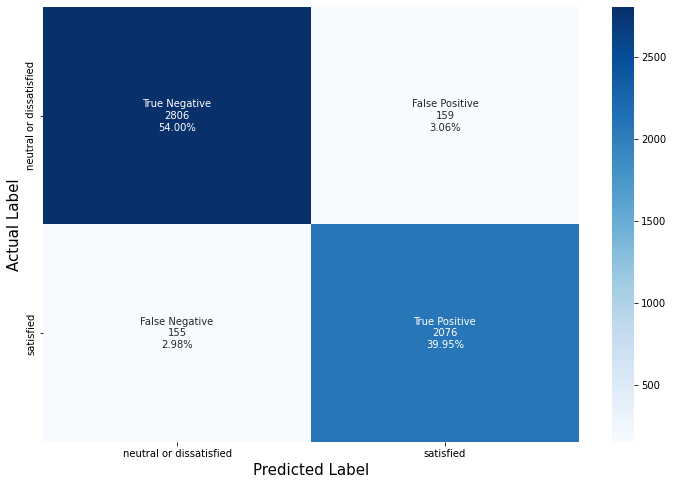

In [ ]:
plt.figure(figsize=(12, 8))
cf_matrix = confusion_matrix(Y_validation, predictions)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], 
               yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

>$ {Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{2081 + 2808}{2081 + 2808 + 157 + 150} = 94.09\% \approx 94\% $

As we saw in the confusion matrix, the model predicted most of the data correctly. If we look at the wrong guesses,
- Model guessed 157 of those who were actually 'neutral or dissatifisfied' wrong and said 'satisfied'. Their rate is 3.02% of the total data.
- Model guessed 150 of those who were actually 'satisfied' wrong and said 'neutral or dissatisfied'. Their rate is 2.89% of the total data.